In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib.ticker import MaxNLocator
import matplotlib.dates as mdates
import seaborn as sns


%matplotlib inline
plt.style.use("ggplot")
plt.rc('font', family='Arial') 
font_T_mini = fm.FontProperties(family='Arial', size=15, stretch=0)

# Get data

In [18]:
def get_data_excel(file_name=None):
    if file_name is None:
        print('Please input file_name')
    else:
        raw_data = pd.read_excel(file_name)
        data = pd.DataFrame({
            'Date': raw_data['TradingDate'],
            'Price': raw_data['ClosePrice']
        })
        # convert date format
        data['Date'] = pd.to_datetime(data['Date'])
        return data

In [19]:
data_list = []  # data sets list
data_name_list = ['Guangdong', 'Hubei', 'Shanghai']  # names of data sets
file_list = ['广东.xlsx', '湖北.xlsx', '上海.xlsx']
for i_file in file_list:
    data_list.append(get_data_excel(i_file))


C:\Windows\Temp\ipykernel_16316\2875558277.py:5: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  raw_data = pd.read_excel(file_name)


# Original Data

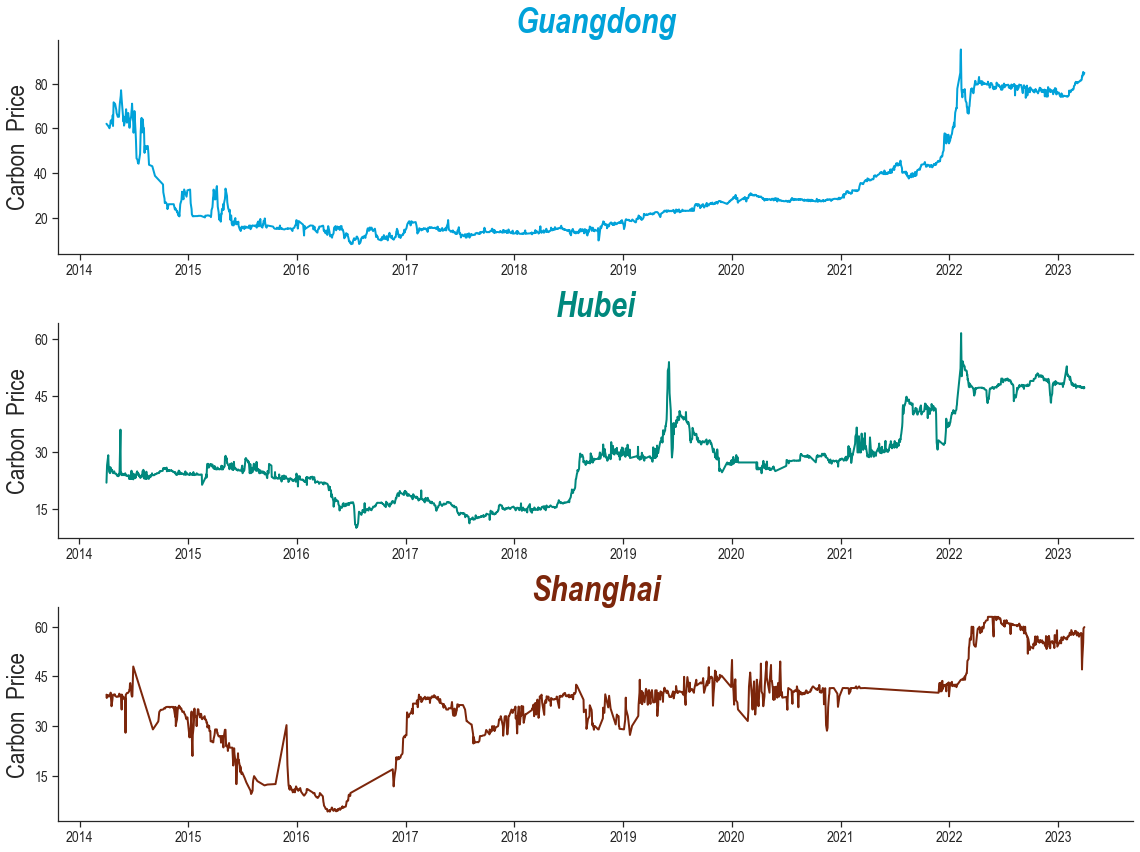

In [20]:
sns.set_theme(style="ticks")
fig, ax = plt.subplots(figsize=(16, 12))

data_number = len(data_list)  # the number of data sets
color_list = ['#01a2d9', '#00887d', '#7c260b']

for a, b, c, d in zip(range(data_number), data_list, data_name_list, color_list):
    data_, data_name, color_ = b, c, d

    # 绘制折线图
    plt.subplot(data_number, 1, a+1)
    sns.lineplot(x='Date', y='Price', data=data_, linewidth=2, color=color_)

    # 设置x轴的刻度值和刻度标签
    years = mdates.YearLocator() # 每年显示一个刻度
    years_fmt = mdates.DateFormatter('%Y') # 刻度标签的格式
    ax = plt.gca()
    ax.xaxis.set_major_locator(years)
    ax.xaxis.set_major_formatter(years_fmt)
    # 设置坐标轴字体
    plt.title(data_name, 
              fontproperties = fm.FontProperties(family='Arial', size=35, stretch=0, weight='bold', style='italic'),
              color=color_)
    plt.xlabel('')
    plt.ylabel('Carbon  Price', fontproperties = fm.FontProperties(family='Arial', size=25, stretch=0))
    plt.xticks(fontproperties = font_T_mini)
    plt.yticks(fontproperties = font_T_mini)
    # 设置y轴刻度数量
    ax.yaxis.set_major_locator(MaxNLocator(5))
    # 移除图像的上边缘和右边缘
    sns.despine()
    plt.tight_layout()
plt.tight_layout()
# 画完图以后控制坐标轴标题对齐
fig.align_ylabels()
fig.align_xlabels()

# Train set and Test set

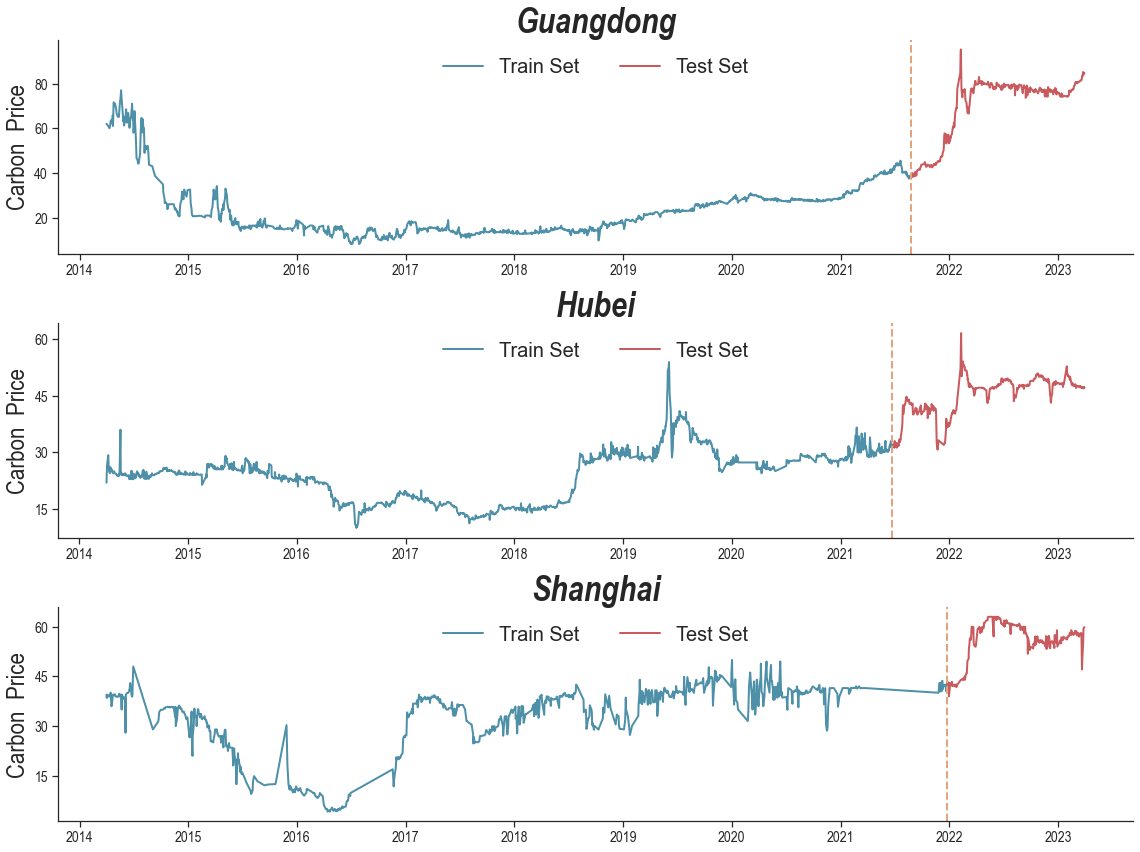

In [21]:
sns.set_theme(style="ticks")
fig, ax = plt.subplots(figsize=(16, 12))

for i, j, k in zip(range(data_number), data_list, data_name_list):
    d_data, d_data_name = j, k
    
    # 将数据按照3:1的比例划分成训练集和测试集
    split_point = int(len(d_data) * 0.8)
    train_data = d_data.iloc[:split_point]
    test_data = d_data.iloc[split_point:]

    # 绘制折线图
    plt.subplot(data_number, 1, i+1)
    sns.lineplot(x='Date', y='Price', data=train_data, label='Train Set', linewidth=2, color='#4E90A8')
    sns.lineplot(x='Date', y='Price', data=test_data, label='Test Set',  linewidth=2, color='#C95B5E')

    # 在图中画出竖直线，表示训练集和测试集分割的位置
    plt.axvline(x=train_data['Date'].iloc[-1], 
                linestyle='--', linewidth=2, color='#E5A27D')

    # 设置x轴的刻度值和刻度标签
    years = mdates.YearLocator() # 每年显示一个刻度
    years_fmt = mdates.DateFormatter('%Y') # 刻度标签的格式
    ax = plt.gca()
    ax.xaxis.set_major_locator(years)
    ax.xaxis.set_major_formatter(years_fmt)

    plt.title(d_data_name, fontproperties = fm.FontProperties(family='Arial', size=35, stretch=0, weight='bold', style='italic'))
    plt.xlabel('')
    plt.ylabel('Carbon  Price', fontproperties = fm.FontProperties(family='Arial', size=25, stretch=0))
    plt.xticks(fontproperties = font_T_mini)
    plt.yticks(fontproperties = font_T_mini)
    # 设置图例字体与位置
    plt.legend(prop = {'family':'Arial', 'size':20}, 
               loc='upper center', 
               ncol=2,
               frameon=False)
    
    # 设置y轴刻度数量
    ax.yaxis.set_major_locator(MaxNLocator(5))
    # 移除图像的上边缘和右边缘
    sns.despine()
    plt.tight_layout()
plt.tight_layout()
# 画完图以后控制y轴标题对齐
fig.align_ylabels()
fig.align_xlabels()

# Train, Validatioin and Test set

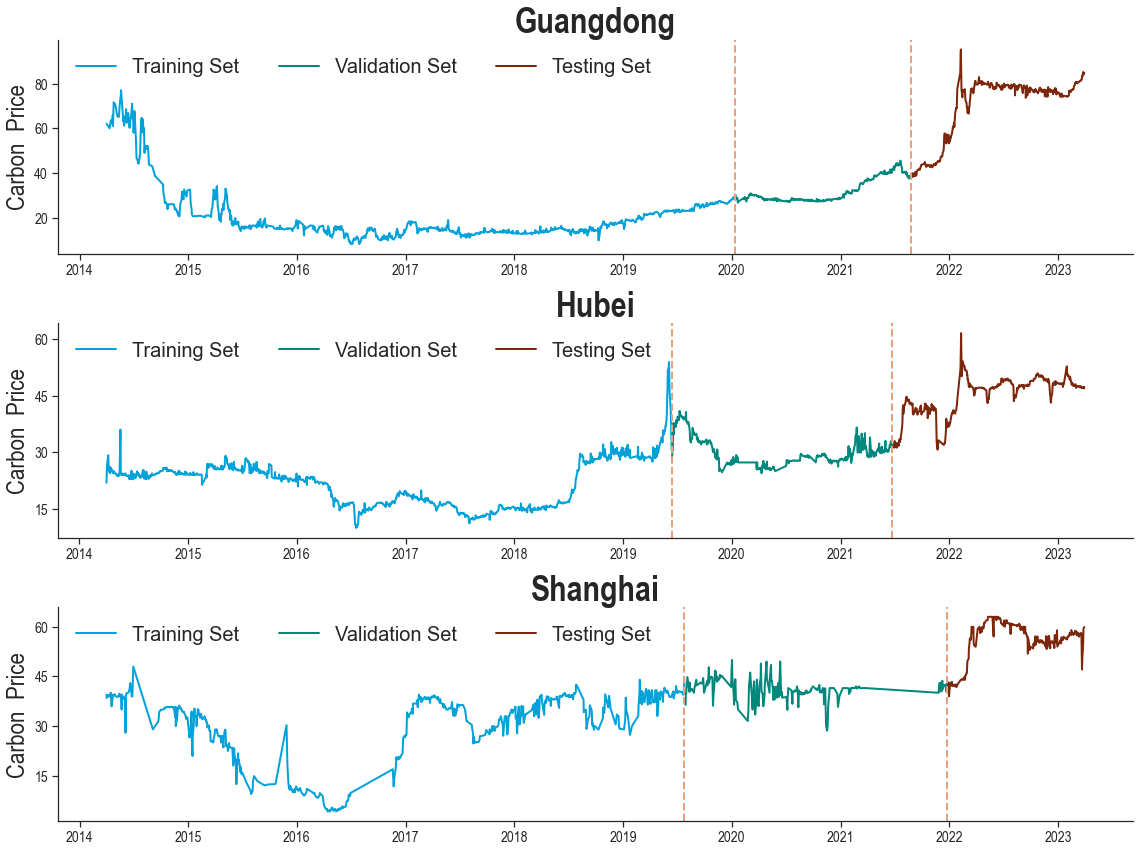

In [22]:
sns.set_theme(style="ticks")
fig, ax = plt.subplots(figsize=(16, 12))

for i, j, k in zip(range(data_number), data_list, data_name_list):
    d_data, d_data_name = j, k
    
    # 将数据按照3:1的比例划分成训练集和测试集
    split_point_1 = int(len(d_data) * 0.6)
    split_point_2 = int(len(d_data) * 0.8)
    train_data = d_data.iloc[:split_point_1]
    val_data = d_data.iloc[split_point_1:split_point_2]
    test_data = d_data.iloc[split_point_2:]

    # 绘制折线图
    plt.subplot(data_number, 1, i+1)
    sns.lineplot(x='Date', y='Price', data=train_data, label='Training Set', linewidth=2, color='#01a2d9')
    sns.lineplot(x='Date', y='Price', data=val_data, label='Validation Set',  linewidth=2, color='#00887d')
    sns.lineplot(x='Date', y='Price', data=test_data, label='Testing Set',  linewidth=2, color='#7c260b')

    # 在图中画出竖直线，表示分割的位置
    plt.axvline(x=train_data['Date'].iloc[-1], 
                linestyle='--', linewidth=2, color='#E5A27D')
    plt.axvline(x=val_data['Date'].iloc[-1], 
                linestyle='--', linewidth=2, color='#E5A27D')

    # 设置x轴的刻度值和刻度标签
    years = mdates.YearLocator() # 每年显示一个刻度
    years_fmt = mdates.DateFormatter('%Y') # 刻度标签的格式
    ax = plt.gca()
    ax.xaxis.set_major_locator(years)
    ax.xaxis.set_major_formatter(years_fmt)

    plt.title(d_data_name, fontproperties = fm.FontProperties(family='Arial', size=35, stretch=0, weight='bold'))
    plt.xlabel('')
    plt.ylabel('Carbon  Price', fontproperties = fm.FontProperties(family='Arial', size=25, stretch=0))
    plt.xticks(fontproperties = font_T_mini)
    plt.yticks(fontproperties = font_T_mini)
    # 设置图例字体与位置
    plt.legend(prop = {'family':'Arial', 'size':20}, 
               loc='upper left',
               ncol=3, 
               frameon=False)
    
    # 设置y轴刻度数量
    ax.yaxis.set_major_locator(MaxNLocator(5))
    # 移除图像的上边缘和右边缘
    sns.despine()
    plt.tight_layout()
plt.tight_layout()
# 画完图以后控制y轴标题对齐
fig.align_ylabels()
fig.align_xlabels()